Reference
- "Numerical Methods for Engineers" Steven C. Chapra, and Raymond P. Canale

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Problem

1.2 
Repeat Example 1.2. Compute the velocity to t = 10s, with a
step size of (a) 1 and (b) 0.5 s. Can you make any statement regarding
the errors of the calculation based on the results?

### Answer

In [2]:
# numerical method:

# first order ODE with initial values
# Euler's method

In [3]:
# 1. functions needed:

g = 9.81
c = 12.5
m = 68.1

def euler(ti, yi, tf, dt):
    """
    The function to solve a differential equation using Euler's method
    """
    t, y = ti, yi
    h = dt
    while t < tf:
        if t + dt > tf:
            h = tf - t
        y += dydt(t, y) * h
        t += h
    return y

def dydt(t, y):
    """
    The function to calculate the derivative of y(t) at t
    """
    return g - (c / m) * y

def anal(t):
    """
    The function returns the y at t using analytical method
    """
    return g * m / c * (1 - np.exp(- (c / m) * t))

In [4]:
# 2. print out the results:

print('----------Result-----------')
print('The result for step size 1: ', euler(0, 0, 10, 1))
print('The result for step size 0.5: ', euler(0, 0, 10, 0.5))

----------Result-----------
The result for step size 1:  46.41119519081522
The result for step size 0.5:  45.650924042455735


---------Analytical Solution---------
0.0      0.00
0.5      4.69
1.0      8.96
1.5     12.86
2.0     16.42
2.5     19.67
3.0     22.63
3.5     25.33
4.0     27.80
4.5     30.05
5.0     32.10
5.5     33.97
6.0     35.68
6.5     37.24
7.0     38.66
7.5     39.95
8.0     41.14
8.5     42.22
9.0     43.20
9.5     44.10
10.0    44.92
dtype: float64
---------Euler Method with Step Size 1---------
0      0.00
1      9.81
2     17.82
3     24.36
4     29.70
5     34.06
6     37.62
7     40.52
8     42.89
9     44.83
10    46.41
dtype: float64
---------Euler Method with Step Size 0.5---------
0.0      0.00
0.5      4.91
1.0      9.36
1.5     13.41
2.0     17.08
2.5     20.42
3.0     23.45
3.5     26.20
4.0     28.70
4.5     30.97
5.0     33.04
5.5     34.91
6.0     36.61
6.5     38.15
7.0     39.56
7.5     40.83
8.0     41.99
8.5     43.04
9.0     44.00
9.5     44.86
10.0    45.65
dtype: float64


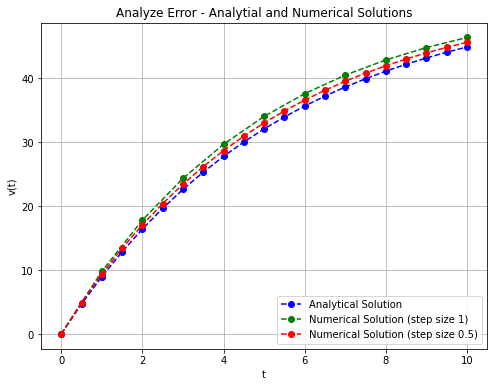

In [5]:
# 3. analyze the result
# make any statement related to the errors of calculation

# analytical solution
t1 = list(np.arange(0, 10.5, 0.5))
y1 = [round(anal(t), 2) for t in t1]
s1 = pd.Series(y1, t1)
print('---------Analytical Solution---------')
print(s1)
# numerical solution with step size 1
t2 = list(np.arange(0, 11, 1))
y2 = [round(euler(0, 0, t, 1), 2) for t in t2]
s2 = pd.Series(y2, t2)
print('---------Euler Method with Step Size 1---------')
print(s2)
# numerical solution with step size 0.5
t3 = list(np.arange(0, 10.5, 0.5))
y3 = [round(euler(0, 0, t, 0.5), 2) for t in t3]
s3 = pd.Series(y3, t3)
print('---------Euler Method with Step Size 0.5---------')
print(s3)

# plot the results
plt.figure(figsize = (8, 6))
plt.plot(t1, y1, 'bo--', label='Analytical Solution')
plt.plot(t2, y2, 'go--', label='Numerical Solution (step size 1)')
plt.plot(t3, y3, 'ro--', label='Numerical Solution (step size 0.5)')
plt.title('Analyze Error - Analytial and Numerical Solutions')
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend(loc='lower right')
plt.grid()

As we can see from the above figure, the blue line indicates the exact correct
solution calculated using the analytical method, and the green and red lines indicate the approximate results from the Euler method with different step sizes.  There are differences between the blue line and the other two lines, since the error could occur due to the approximation.  But as expected, when the step size is smaller, such as 0.5 instead of 1, we could see that the red line is closer to the correct blue line, which makes sense.